In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2> Read the image</h2>


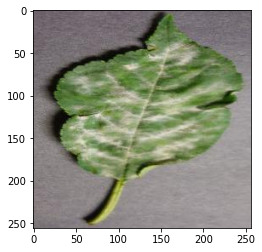

In [397]:
folderPath = "./cherry_powdery_mildew"
imageNo = 37

image = cv2.cvtColor(cv2.imread(f'{folderPath}/{imageNo}.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

<h1> Smoothen Image </h1>

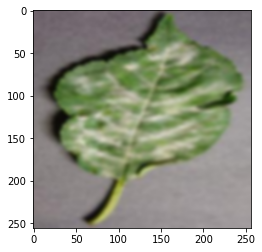

In [398]:
smooth = cv2.GaussianBlur(image, (7, 7), 2)

plt.imshow(smooth)

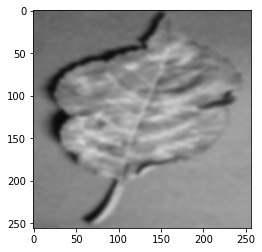

In [399]:
g = smooth[:, :, 1]

plt.imshow(g, cmap = 'gray', vmin = 0, vmax = 255)

<h3> Intensity histogram</h3>

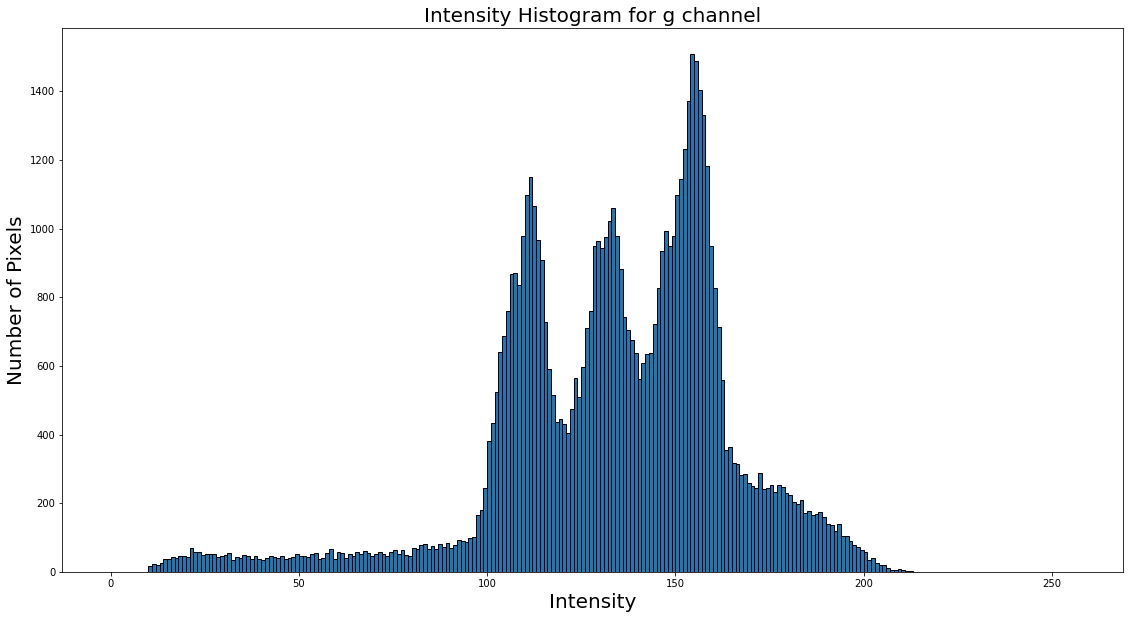

In [400]:
plt.figure(figsize = (19, 10))
plt.title("Intensity Histogram for g channel", fontsize = 20)
plt.xlabel("Intensity", fontsize = 20)
plt.ylabel("Number of Pixels", fontsize = 20)
histo,bins,_=plt.hist(g.flat, bins=256, range=(0, 256),ec='black')
plt.show()

<h2> Contrast Stretching </h2>

In [401]:
def stretch_contrast(image):
    '''
    Function to perform contrast stretching given an input image.
    
    Inputs =>
    image : numpy.ndarray representation of the image (must be only one channel)
    
    Returns =>
    con_image : min-max contrast stretched representation of the input image
    
    '''
    
    con_image = np.copy(image).reshape(-1)
    
    #min intensity
    min_i = np.amin(con_image)
    
    #max intensity
    max_i = np.amax(con_image)
    
    for idx, pixel in enumerate(con_image):
        
        con_image[idx] = 255 * ((pixel - min_i) / (max_i - min_i))
    
    #reshape and return
    con_image = con_image.reshape(image.shape)
    con_image = con_image.astype("uint8")
    
    return con_image
    

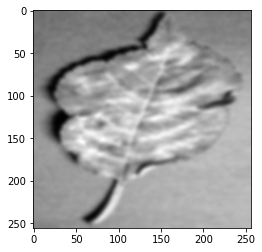

In [402]:
con_image = stretch_contrast(g)

plt.imshow(con_image, cmap = 'gray', vmin = 0, vmax = 255)

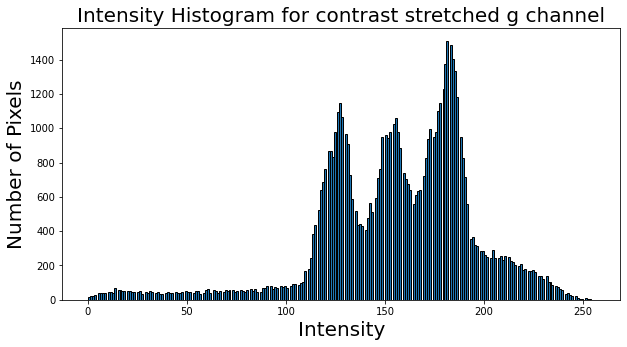

In [403]:
plt.figure(figsize = (10, 5))
plt.title("Intensity Histogram for contrast stretched g channel", fontsize = 20)
plt.xlabel("Intensity", fontsize = 20)
plt.ylabel("Number of Pixels", fontsize = 20)
histo,bins,_= plt.hist(con_image.flat, bins=256, range=(0, 256),ec='black')
plt.show()

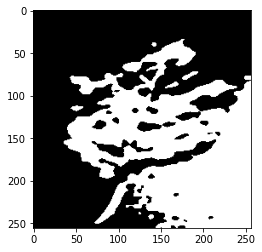

In [404]:
res, th2 = cv2.threshold(con_image, 170, 255, cv2.THRESH_BINARY )

plt.imshow(th2, cmap = 'gray', vmin = 0, vmax = 255)

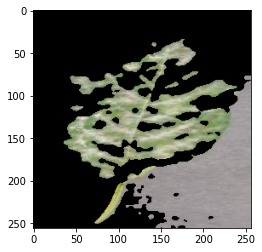

In [405]:
resImg = cv2.bitwise_and(image, image, mask = th2)
plt.imshow(resImg)

<p> No satisfactory results in the r,g and b channel </p>

<h2> Trying the lab colorspace </h2>

In [406]:
lab = cv2.cvtColor(smooth, cv2.COLOR_RGB2LAB)

a = lab[:, :, 1]
b = lab[:, :, 2]

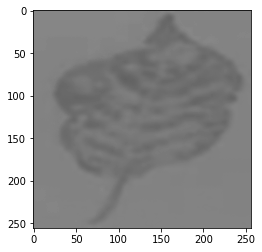

In [407]:
plt.imshow(a, cmap = 'gray', vmin = 0, vmax = 255)

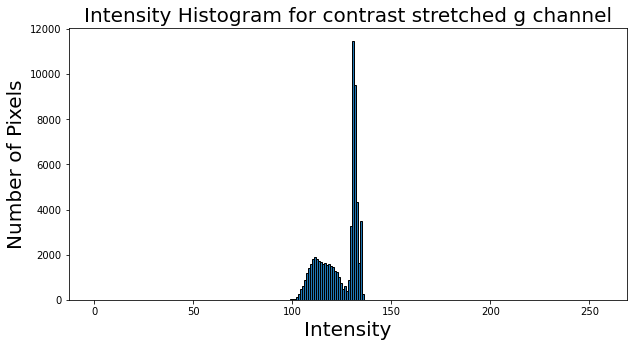

In [408]:
plt.figure(figsize = (10, 5))
plt.title("Intensity Histogram for contrast stretched g channel", fontsize = 20)
plt.xlabel("Intensity", fontsize = 20)
plt.ylabel("Number of Pixels", fontsize = 20)
histo,bins,_= plt.hist(a.flat, bins=256, range=(0, 256),ec='black')
plt.show()

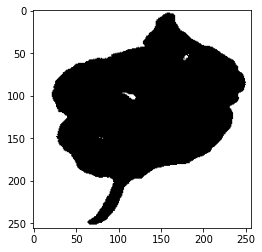

In [409]:
res, th = cv2.threshold(a, 125, 255, cv2.THRESH_BINARY)

plt.imshow(th, cmap = 'gray', vmin = 0, vmax = 255)

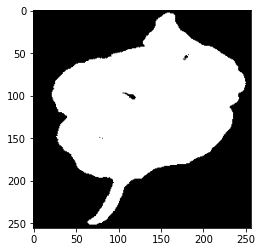

In [410]:
th = 255 - th
plt.imshow(th, cmap = 'gray', vmin = 0, vmax = 255)

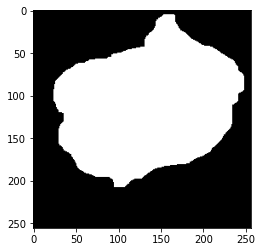

In [411]:
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel = np.ones((5, 5)), iterations = 3)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel = np.ones((5, 5)), iterations = 2)
plt.imshow(closing, cmap = 'gray', vmin = 0, vmax = 255)

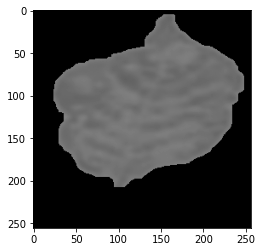

In [412]:
a = cv2.bitwise_and(a, a, mask = closing)

plt.imshow(a, cmap = 'gray', vmin = 0, vmax = 255)

<h2> Contrast Stretching </h2>

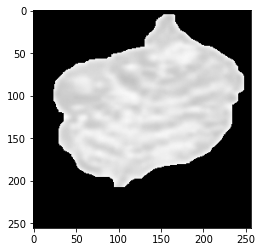

In [413]:
con_a = stretch_contrast(a)

plt.imshow(con_a, cmap = 'gray', vmin = 0 , vmax = 255)

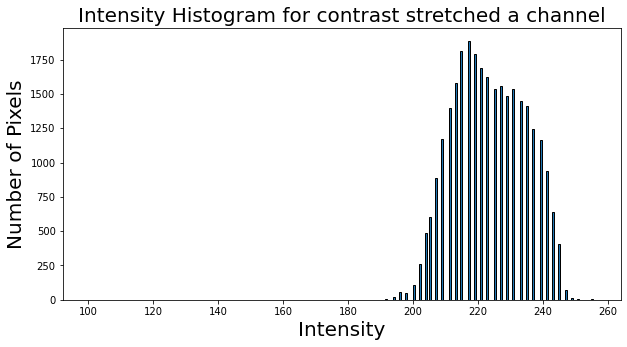

In [414]:
plt.figure(figsize = (10, 5))
plt.title("Intensity Histogram for contrast stretched a channel", fontsize = 20)
plt.xlabel("Intensity", fontsize = 20)
plt.ylabel("Number of Pixels", fontsize = 20)
histo,bins,_= plt.hist(con_a.flat, bins=256, range=(100, 256),ec='black')
plt.show()

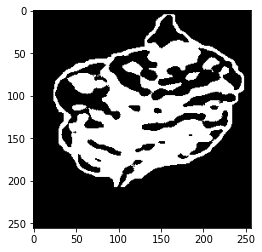

In [415]:
_, im = cv2.threshold(con_a, 217, 255, cv2.THRESH_BINARY)

plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 255)

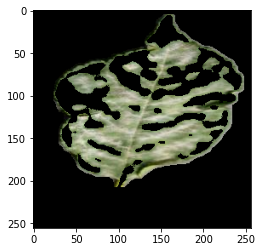

In [416]:
resImg = cv2.bitwise_and(image, image, mask = im)
plt.imshow(resImg)

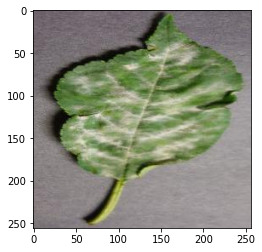

In [417]:
plt.imshow(image)